gaussian
periodic
gaussianPeriodic


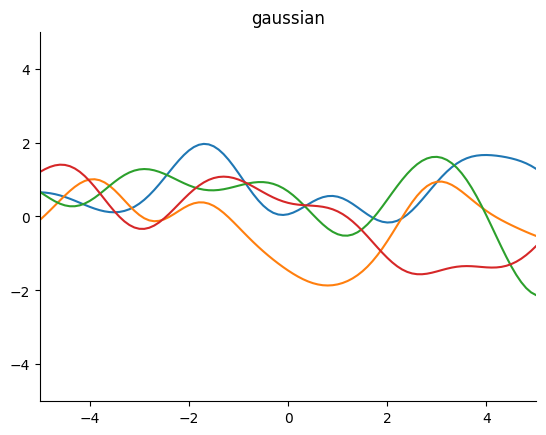

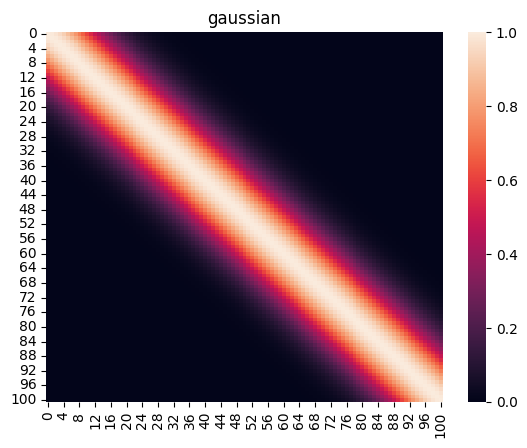

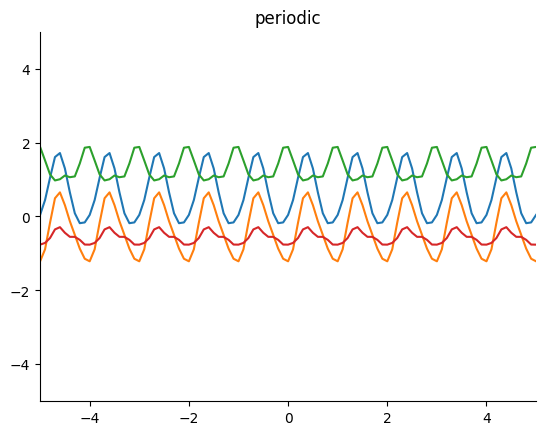

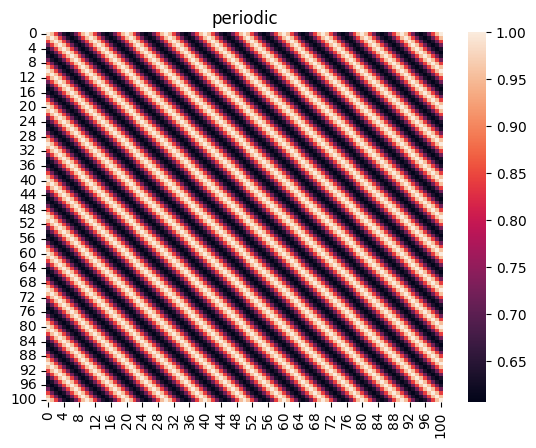

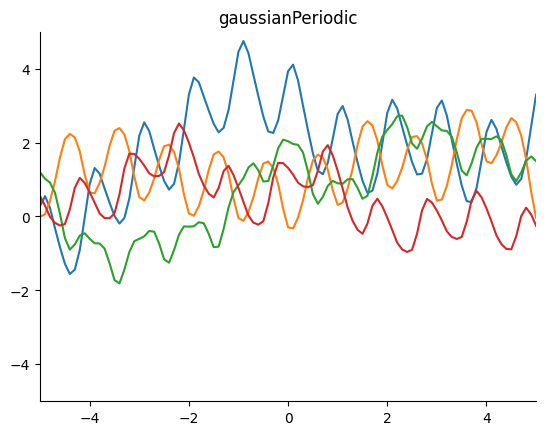

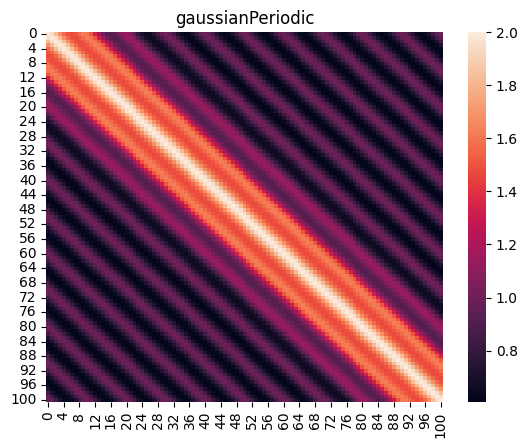

In [1]:
# I wrote these codes refering https://statmodeling.hatenablog.com/entry/how-to-use-GPy

import library.putil as putil
import numpy as np
from numpy.random import multivariate_normal as mvnrand
import matplotlib.pyplot as plt
import seaborn as sns

import GPy

xmax = 5
xmin = -5
ymax = 5
ymin = -5
M    = 4
N    = 101

SAVE_FILE = ""

def fgp (xx, kernel):
    N = len(xx)
    return mvnrand (np.zeros(N), kernel.K(xx, xx))

def fgpGetK(xx, kernel):
    return kernel.K(xx, xx)

def plotKernel(kernelName, kernelFunc):
    xx = np.linspace (xmin, xmax, N)

    fig = plt.figure()
    ax = fig.add_subplot()

    print(kernelName)
    for m in range(M):
        plt.plot (xx, fgp (xx[:, None], kernelFunc))

    putil.simpleaxis ()

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title(kernelName)

    fig = plt.figure()
    ax = fig.add_subplot()
    sns.heatmap(fgpGetK (xx[:, None], kernelFunc))
    ax.set_title(kernelName)

def main ():
    kernelName = ['gaussian', 'periodic', 'gaussianPeriodic']
    kernelFunc = [GPy.kern.RBF(1), GPy.kern.StdPeriodic(1), GPy.kern.RBF(1) + GPy.kern.StdPeriodic(1)]

    for kName, kFunc in zip(kernelName, kernelFunc):
        plotKernel(kName, kFunc)

    if len(SAVE_FILE) > 0:
        putil.savefig (SAVE_FILE)
    plt.show ()

if __name__ == "__main__":
    main ()

Text(0.5, 1.0, 'Samples function and data')

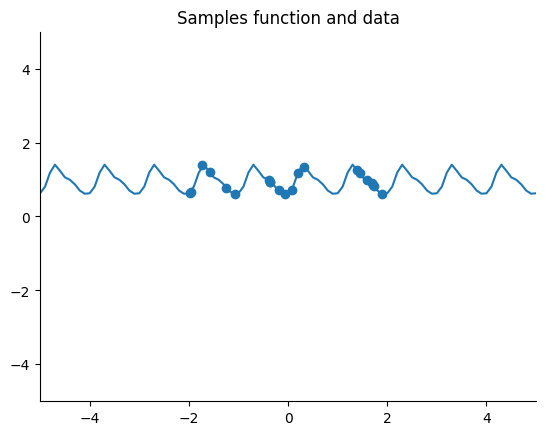

In [2]:
# Sample data points here
# We use eriodic kernel for sampling 

SAMPLE_NUM = 21
SAMPLE_XMIN = -2.0
SAMPLE_XMAX = 2.0

noizeBeta = 0.02

# xs for plot
xx = np.linspace (xmin, xmax, N)

# Select xs for samples
sampleXs = np.random.rand(SAMPLE_NUM) * (SAMPLE_XMAX - SAMPLE_XMIN) + SAMPLE_XMIN
#sampleXs = np.linspace (SAMPLE_XMIN, SAMPLE_XMAX, SAMPLE_NUM)

xsAll = np.concatenate([xx, sampleXs])
#print(xsAll)
#kAll = fgpGetK(xsAll[:, None], GPy.kern.StdPeriodic(input_dim = 1, variance = 5.0, period = 2.0, lengthscale = 2.0))
kAll = fgpGetK(xsAll[:, None], GPy.kern.StdPeriodic(input_dim = 1))
#print(kAll)

# Sample data
ysAll = mvnrand (np.zeros(len(xsAll)), kAll)
#print(ysAll)
yy = ysAll[0 : len(xx)]
sampleYs = ysAll[len(xx) : ] + noizeBeta * np.random.randn(SAMPLE_NUM)
#print(yy)
#print(sampleYs)

# Plot data
fig = plt.figure()
ax = fig.add_subplot()

plt.plot (xx, yy)
plt.scatter(sampleXs, sampleYs)

putil.simpleaxis ()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_title("Samples function and data")

Log likelihood of  EQ  :  -6.309442871998586
Log likelihood of  per  :  35.55318262318218
Log likelihood of  EQ+per  :  7.300382819109128


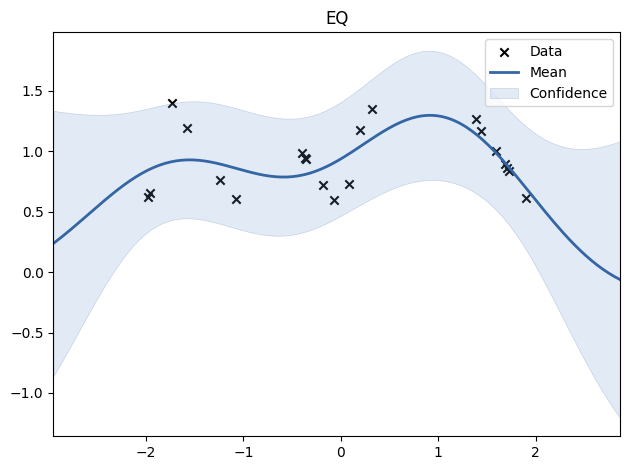

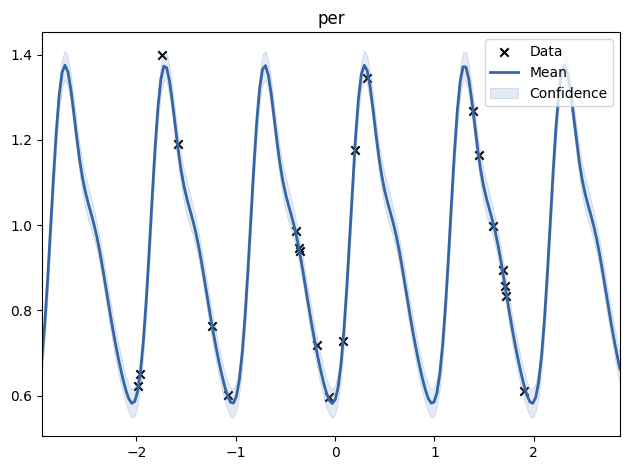

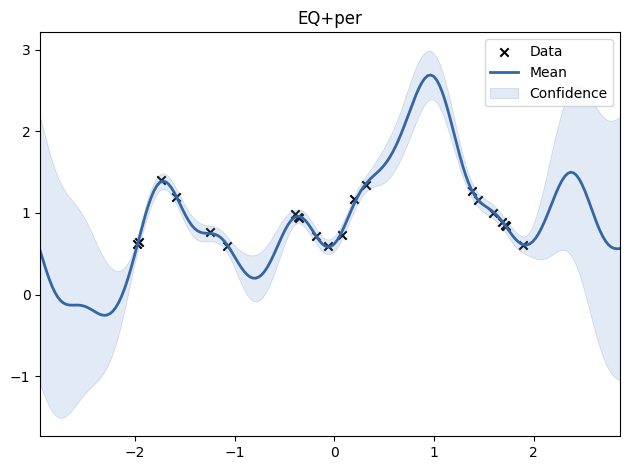

In [3]:
# Estimate the function using periodic kernel
kernels = [GPy.kern.RBF(1), GPy.kern.StdPeriodic(1), GPy.kern.RBF(1) + GPy.kern.StdPeriodic(1)]
kernelNames = ["EQ", "per", "EQ+per"]

for kernel, kernelName in zip(kernels, kernelNames):
    model = GPy.models.GPRegression(sampleXs[:, None], sampleYs[:, None], kernel=kernel)
    model.optimize()
    model.plot()
    plt.title(kernelName)
    print("Log likelihood of ", kernelName, " : ", model.log_likelihood())
